In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
from scipy.special import entr

In [2]:
dataset_path_1st = r'C:\Users\SWIFT 3\Bearing Fault Detection\Dataset\1st_test'
dataset_path_2nd = r'C:\Users\SWIFT 3\Bearing Fault Detection\Dataset\2nd_test'
dataset_path_3rd = r'C:\Users\SWIFT 3\Bearing Fault Detection\Dataset\4th_test\txt'

In [3]:
# Test for the first file
dataset = pd.read_csv(r'C:\Users\SWIFT 3\Bearing Fault Detection\Dataset\2nd_test\2004.02.12.10.32.39', sep='\t')
dataset.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']
dataset.mean().abs()

Bearing 1    0.010194
Bearing 2    0.012692
Bearing 3    0.014535
Bearing 4    0.010026
dtype: float64

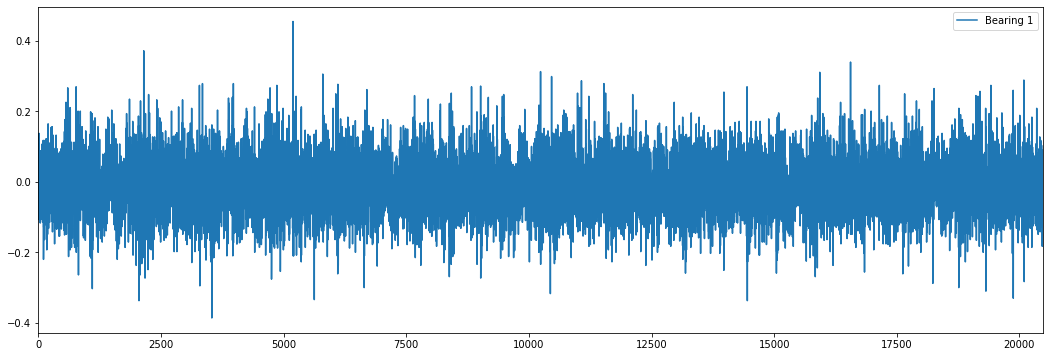

In [4]:
# raw signal
dataset[['Bearing 1']].plot(figsize=(18,6));

In [5]:
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)

def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_a','B1_b','B2_a','B2_b','B3_a','B3_b','B4_a','B4_b']
    cols2 = ['B1','B2','B3','B4']
    
    if id_set == 1:
        columns = [i+'_'+tf for i in cols1 for tf in time_features]
        data = pd.DataFrame(columns = columns)
    else:
        columns = [i+'_'+tf for i in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)
        
    for filename in os.listdir(dataset_path):
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        data = data.append(merge)
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data
                               

In [6]:
%%time
set1 = time_features(dataset_path_1st, id_set=1)
set2 = time_features(dataset_path_2nd, id_set=2)
set3 = time_features(dataset_path_3rd, id_set=3)

C:\Users\SWIFT 3\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Wall time: 37min 36s


In [7]:
set2.isnull().sum().sum()

0

In [8]:
set1.to_csv('set1_timefeatures.csv')
set2.to_csv('set2_timefeatures.csv')
set3.to_csv('set3_timefeatures.csv')

In [9]:
set3 = pd.read_csv("./set3_timefeatures.csv")
set3

,Unnamed: 0,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,...,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse
0,2004-03-04 09:27:46,0.061630,0.079632,0.030945,1.293219,4.797487,0.079770,0.569,1.116,7.133019,...,0.038762,0.560486,4.529537,0.055493,0.303,0.557,5.460149,0.036303,1.276447,6.969589
1,2004-03-04 09:32:46,0.060774,0.078513,-0.013895,1.157942,4.868368,0.078677,0.491,0.952,6.240741,...,0.013937,0.356269,4.487724,0.053352,0.249,0.461,4.667121,0.035253,1.269095,5.923021
2,2004-03-04 09:42:46,0.062195,0.079787,0.033416,0.890444,4.889695,0.079817,0.515,0.969,6.452262,...,0.034319,0.478659,4.480881,0.052704,0.278,0.556,5.274739,0.034633,1.274279,6.721489
3,2004-03-04 09:52:46,0.062994,0.081046,-0.027055,1.182243,4.834093,0.081084,0.552,1.072,6.807721,...,0.007334,0.342723,4.519586,0.054843,0.300,0.569,5.470193,0.036072,1.271674,6.956300
4,2004-03-04 10:02:46,0.061945,0.079128,-0.017849,0.586162,4.885535,0.079166,0.381,0.750,4.812653,...,0.023480,0.262501,4.505514,0.053912,0.247,0.474,4.581558,0.035797,1.265030,5.795806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,2004-04-18 02:02:55,0.122483,0.154771,0.161938,0.284736,5.333972,0.154788,0.742,1.409,4.793663,...,-0.026604,0.022745,5.564207,0.248086,0.955,1.822,3.849468,0.163276,1.271138,4.893207
6320,2004-04-18 02:12:55,0.110250,0.137863,0.109064,0.035596,5.328223,0.137873,0.613,1.189,4.446121,...,0.104359,-0.257408,5.640416,0.253657,0.918,1.731,3.619058,0.176263,1.232366,4.460003
6321,2004-04-18 02:22:55,0.115789,0.147167,0.291530,0.553389,5.254552,0.147183,0.754,1.442,5.122891,...,0.002816,0.031035,5.501685,0.279857,1.104,2.186,3.944873,0.187490,1.259629,4.969075
6322,2004-04-18 02:32:55,0.119909,0.154457,0.440061,1.094297,5.235420,0.154483,0.933,1.565,6.039509,...,-0.108542,-0.485606,5.672267,0.282170,0.969,1.850,3.434099,0.194709,1.232046,4.230966
